In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from math import *
import numpy as np

In [2]:
def jacobiIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C = sum([A[i][j] * x_k[j] for j in range(i)]) + sum([A[i][j] * x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i] - C)/A[i][i])
    return(x_k1)

def gaussSeidelIteration(x_k,A,b):
    x_k1 = []
    for i in range(len(x_k)):
        C= sum([A[i][j]*x_k1[j] for j in range(i)])
        D= sum([A[i][j]*x_k[j] for j in range(i+1,len(b))])
        x_k1.append((b[i]-C-D)/A[i][i])
    return(x_k1)

In [3]:
def poissonMatrix(n):
    m = n
    size = n * (n-2) + 2 * m
    #matrix initialization
    #A = [[0 for j in range(size)] for i in range(size)]
    A = np.zeros((size,size))

    #matrix rows corresponding to upper boundary conditions
    for i in range(m):
        A[i,i] = 1
    
    for i in range(m, size - m):
        if ((i - m) % n == 0) or ((i - (m + n - 1))%n==0):
            A[i,i] = 1
        else:
            A[i,i] = 4
            A[i,i-1] = -1
            A[i,i+1] = -1
            A[i,i - (n)] = -1
            A[i,i + (n)] = -1

    #for the lower boundary conditions
    for i in range(size - m, size):
        A[i,i] = 1
    
    return A

def testF(n,g,f):
    out = []
    m = n
    for i in range(m):
        out.append(g[i])

    for i in range(n-2):
        out.append(g[2*i + (m)])
        for j in range(n-2):
            out.append(f[i*(n-2) + j])
        out.append(g[2*i + (m)+1])

    for i in range(len(g) - (m), len(g)):
        out.append(g[i])
    
    return out

def formatSol(n,u):
    out = []
    temp = []

    for i in range(n):
        for j in range(n):
            temp.append(u[i*n+j])
        out.append(temp)
        temp = []

    return np.matrix(out)

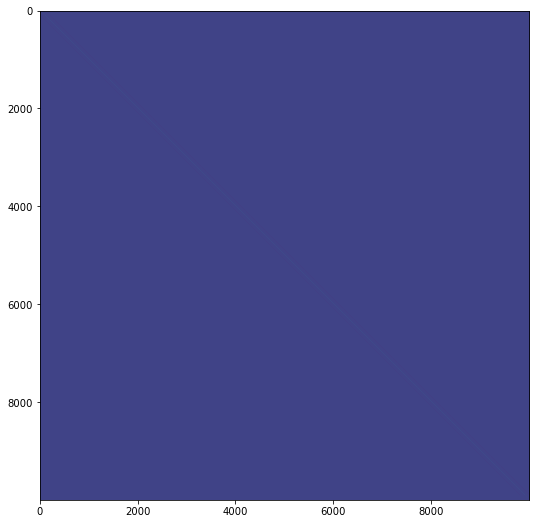

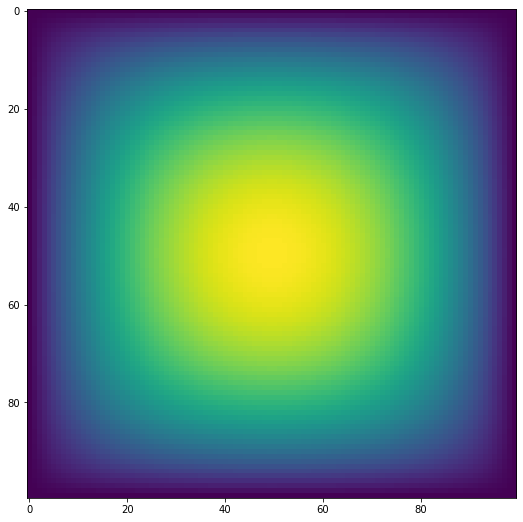

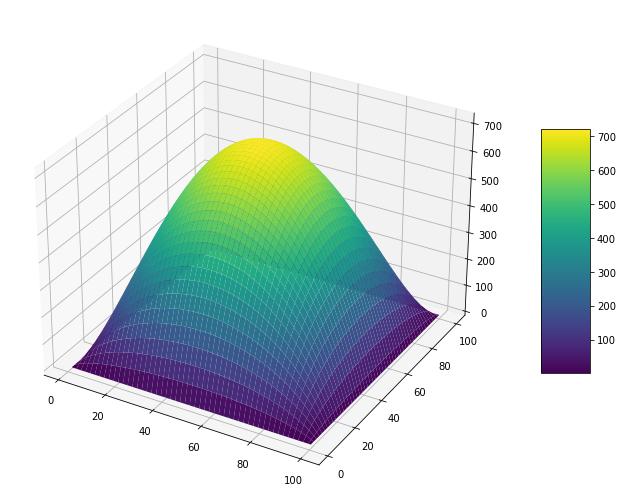

In [11]:
plt.rcParams['figure.figsize'] = [16,9]
colorMap = 'viridis'

N = 100
mat = poissonMatrix(N)
plt.imshow(mat)
plt.show()

g = np.zeros((N-2) * 4 + 4)
fi = np.ones((N-2) * (N-2))
#fi[int((N-2)/2)*(N-2)+int((N-2)/2)] = 1


f = testF(N,g,fi)

u = np.linalg.solve(mat,f)
sol = formatSol(N,u)

plt.imshow(sol,cmap = colorMap)
plt.show()


X = np.arange(1,N+1)
Y = np.arange(1,N+1)

X,Y = np.meshgrid(X,Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X,Y,sol,cmap = colorMap)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
